# Problem Statement

For predicting, if a user will have Sarcopenia or not, we need to build 3 models.

- Model 1
    - Determine the probability that the patient has Sarcopenia based on variables available when the patient is home, such as age, weight, height, exercise, Hyper tension, DM, Education, Smoking etc. Such values can be obtained without the 
patient reporting physically to a clinic. 
    - At the end of Model1, diagnose patients with very high probability of developing Sarc as positive and very low robability of Sarc as negative. 
    - The remaining patients need further testing, so send them to the send model.
    
- Model 2
    - Predict the Sarcopenia probability including CST and GSP. To measure CST, “Chair Stand Test”, a physician times a patient when she sits and stands up on a chair five times. To measure GDP, “Gait speed test”, a physician times a patient when she walks a certain distance. We are provided with these two features in the dataset. In the second model, in addition to the variables we used in the first model, we will include CST and GDP.

- Model 3 
    - Predict the Sarcopenia including ‘GRS’, Grip Strength Test. A physician measures the grp strength of a patient using a gyro hand grip. We will include GRS into our model with all the variables from Model2.
    
The remaining patients after Model 3 will go through ultrasound process to measure their muscle thickness, which will increase the certainty for diagnosing whether they have Sarcopenia. Our goal is, making the diagnosis as much as possible and reduce number of patients going through extra tests.

### What is Random Forest ?

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. Decision trees are the building blocks of the Random forest model. Fortunately, they are pretty intuitive.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all error in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:
   - There needs to be some actual signal in our features so that models built using those features do better than random guessing.
   - The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.

It is important to ensure that the Models Diversify Each Other. In other words, random forest ensures that the behavior of each individual tree is not too correlated with the behavior of any of the other trees in the model by using the following two methods:
   - Bagging (Bootstrap Aggregation) — Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.
   
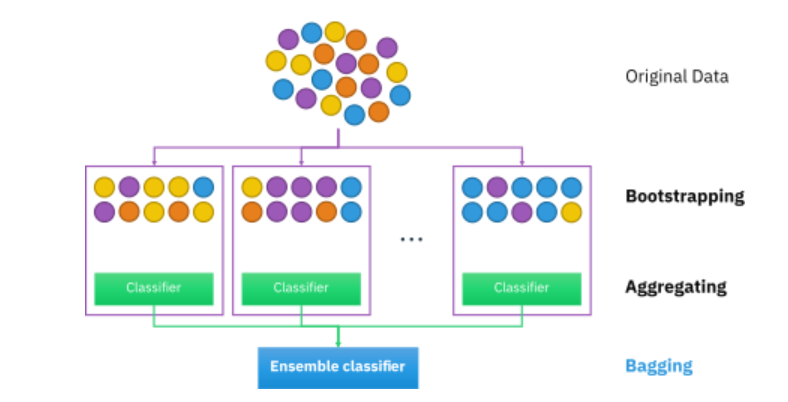
   - Feature Randomness — In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.


### Steps involved in random forest algorithm
-  In Random forest n number of random records are taken from the data set having k number of records.
-  Individual decision trees are constructed for each sample.
-  Each decision tree will generate an output.
-  Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

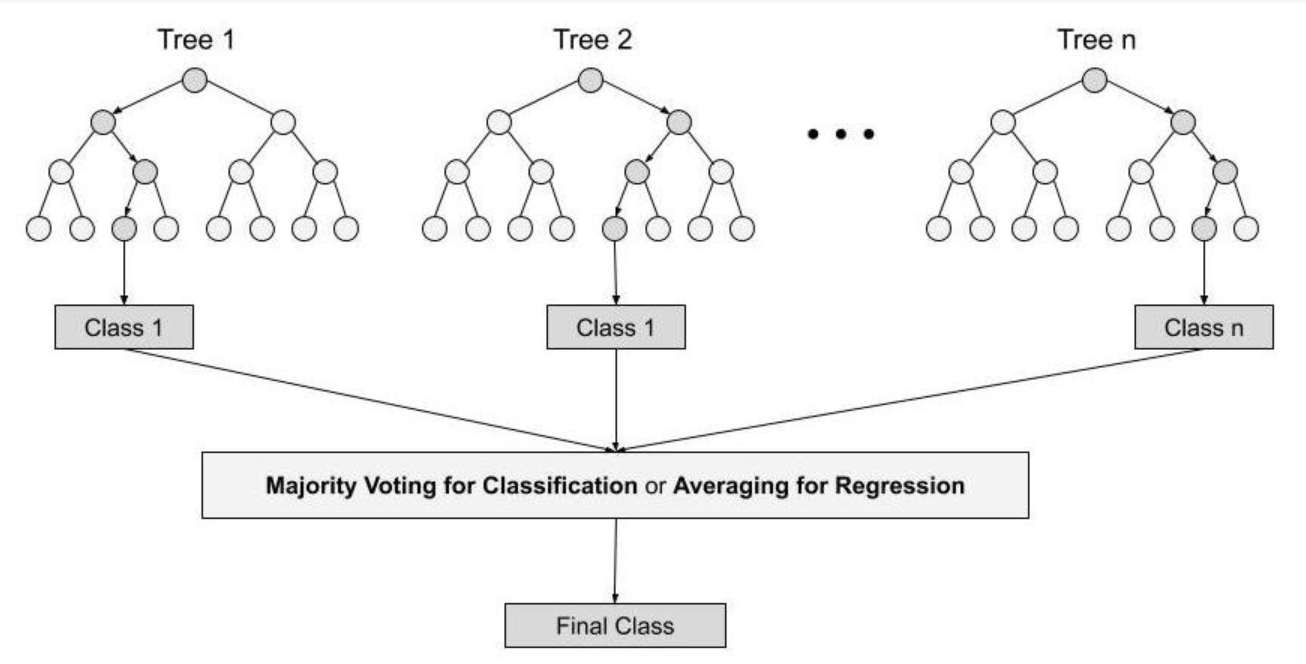

### Important Features of Random Forest
- Diversity- Not all attributes/variables/features are considered while making an individual tree, each tree is different.
- Immune to the curse of dimensionality- Since each tree does not consider all the features, the feature space is reduced.
- Parallelization-Each tree is created independently out of different data and attributes. This means that we can make full use of the CPU to build random forests.
- Train-Test split- In a random forest we don’t have to segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree.
- Stability- Stability arises because the result is based on majority voting/ averaging.

### Advantages of random Forest
- It can be used in classification and regression problems.

- It solves the problem of overfitting as output is based on majority voting or averaging.

- It performs well even if the data contains null/missing values.

- Each decision tree created is independent of the other thus it shows the property of parallelization.

- It is highly stable as the average answers given by a large number of trees are taken.

- It maintains diversity as all the attributes are not considered while making each decision tree though it is not true in all cases.

- It is immune to the curse of dimensionality. Since each tree does not consider all the attributes, feature space is reduced.

- We don’t have to segregate data into train and test as there will always be 30% of the data which is not seen by the decision tree made out of bootstrap.

### Disadvantages of random forest

- Random forest is highly complex when compared to decision trees where decisions can be made by following the path of the tree.

- Training time is more compared to other models due to its complexity. Whenever it has to make a prediction each decision tree has to generate output for the given input data.

### Load the libraries

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [3]:
import copy
df_X_train=pd.read_csv("X_train.csv",index_col=0)
df_X_train_copy=copy.deepcopy(df_X_train)
df_X_train_copy.shape

(1042, 37)

In [4]:
df_X_test=pd.read_csv("X_test.csv",index_col=0)
df_X_test_copy=copy.deepcopy(df_X_test)
df_X_test_copy.shape

(261, 37)

In [5]:
df_y_train=pd.read_csv("y_train.csv")
df_y_train.drop(['Unnamed: 0'],axis=1,inplace=True)
df_y_train_copy = copy.deepcopy(df_y_train)
df_y_train_copy.shape

(1042, 1)

In [6]:
df_y_test=pd.read_csv("y_test.csv")
df_y_test.drop(['Unnamed: 0'],axis=1,inplace=True)
df_y_test_copy = copy.deepcopy(df_y_test)
df_y_test_copy.shape

(261, 1)

### Build the model 1 based on variables available when the patient is home

In [7]:
#all columns avaiable when patient is at home
cols =  ['Education_new','Occupation_new','Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ','HT duration_new',
'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new','Hip_new', 'Smoking_new', 'DM duration_new','Gender_M', '  Alcohol_REGULAR',
'  Alcohol_SOCIAL','Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK']
cols

['Education_new',
 'Occupation_new',
 'Working Status_new',
 'Smoking (packet/year)_new',
 'Age',
 'DM ',
 'HT duration_new',
 'MMSE_new',
 'Weight_new',
 'Height_new',
 'Waist_new',
 'Hip_new',
 'Smoking_new',
 'DM duration_new',
 'Gender_M',
 '  Alcohol_REGULAR',
 '  Alcohol_SOCIAL',
 'Exercise_new_1-2/WEEK',
 'Exercise_new_3-4/WEEK']

In [8]:
X_train= df_X_train_copy[cols]
X_train.shape

(1042, 19)

In [9]:
X_test= df_X_test_copy[cols]
X_test.shape

(261, 19)

In [10]:
y_train =df_y_train_copy
y_train.shape

(1042, 1)

In [11]:
y_test =df_y_test_copy
y_test.shape

(261, 1)

##### Create the model

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=100,#number of trees in the forest
                            criterion='gini',#function to measure the quality of split
                            min_samples_split=2,#minimum number of samples required to split an internal node
                            min_samples_leaf=1,#minimum number of samples required to be at a leaf node
                            max_depth=5,#maximum depth of the tree
                            bootstrap=True,#Whether bootstrap samples are used when building trees.
                            oob_score=True,#Whether to use out-of-bag samples to estimate the generalization score
                            n_jobs=-1,#number of jobs in parallel
                            random_state=42,#Controls both the randomness of the bootstrapping of the samples used
                                            #when building trees (if ``bootstrap=True``) and the sampling of the
                                            #features to consider when looking for the best split at each node
                        verbose=0 #Controls the verbosity when fitting and predicting
                        )

rf1

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

##### Fit or train the model

In [13]:
rf1.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

###### Out of bag (OOB)  

Out of bag (OOB) score is a way of validating the Random forest model. 

As compared to the validation score OOB score is computed on data that was not necessarily used in the analysis of the model. Whereas for calculation validation score, a part of the original training dataset is actually set aside before training the models. Additionally, the OOB score is calculated using only a subset of DTs not containing the OOB sample in their bootstrap 
training dataset. While the validation score is calculated using all the DTs of the ensemble.

Only a subset of DTs is used for determining the OOB score. This leads to reducing the overall aggregation effect in bagging. Thus in general, validation on a full ensemble of DTs is better than a subset of DT for estimating the score. However, occasionally the dataset is not big enough and hence set aside a part of it for validation is unaffordable. Consequently, in cases where we do not have a large dataset and want to consume it all as the training dataset, the OOB score provides a good trade-off. Nonetheless, it should be noted that validation score and OOB score are unalike, computed in a different manner and should not be thus compared.

In an ideal case, about 36.8 % of the total training data forms the OOB sample.

In [14]:
rf1.oob_score_

0.8080614203454894

##### Make predictions on test data

In [15]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred_rf1, y_test)
acc

0.8007662835249042

In [17]:
X_train_proba = rf1.predict_proba(X_train)
X_train_proba[:,:]

array([[0.92361819, 0.07638181],
       [0.91787027, 0.08212973],
       [0.77698778, 0.22301222],
       ...,
       [0.68999444, 0.31000556],
       [0.93036631, 0.06963369],
       [0.84920916, 0.15079084]])

In [18]:
X_test_proba = rf1.predict_proba(X_test)
X_test_proba[:,:]

array([[0.91471739, 0.08528261],
       [0.67532473, 0.32467527],
       [0.60165357, 0.39834643],
       [0.80282743, 0.19717257],
       [0.87705952, 0.12294048],
       [0.65093683, 0.34906317],
       [0.89334199, 0.10665801],
       [0.87793857, 0.12206143],
       [0.843634  , 0.156366  ],
       [0.86103365, 0.13896635],
       [0.81848245, 0.18151755],
       [0.85250243, 0.14749757],
       [0.88012632, 0.11987368],
       [0.6897312 , 0.3102688 ],
       [0.7523324 , 0.2476676 ],
       [0.90579134, 0.09420866],
       [0.86044884, 0.13955116],
       [0.85617624, 0.14382376],
       [0.88076106, 0.11923894],
       [0.85456107, 0.14543893],
       [0.89076637, 0.10923363],
       [0.67686515, 0.32313485],
       [0.73372914, 0.26627086],
       [0.90333489, 0.09666511],
       [0.82880649, 0.17119351],
       [0.86877813, 0.13122187],
       [0.63784178, 0.36215822],
       [0.74963736, 0.25036264],
       [0.90511399, 0.09488601],
       [0.83246892, 0.16753108],
       [0.

In [19]:
X_train['Prob_0']=pd.DataFrame(X_train_proba[:,0],columns=['Prob_0'])
X_train['Prob_1']=pd.DataFrame(X_train_proba[:,1],columns=['Prob_1'])
X_train.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Hip_new,Smoking_new,DM duration_new,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,Prob_0,Prob_1
0,0.8125,0.423645,0.448276,0.000000,0.177778,0.0,0.16,0.379926,0.430769,0.785714,...,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.923618,0.076382
1,0.8125,0.689655,0.793103,0.000000,0.022222,0.0,0.00,0.379926,0.692308,0.476190,...,0.425926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.917870,0.082130
2,0.7500,0.995074,0.931034,0.637681,0.177778,0.0,0.80,0.250000,0.661538,0.571429,...,0.481481,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.776988,0.223012
3,0.0000,0.137931,0.724138,0.420290,0.200000,0.0,0.28,0.379926,0.584615,0.714286,...,0.611111,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.874320,0.125680
4,0.1250,0.960591,0.034483,0.000000,0.000000,0.0,0.01,1.000000,0.446154,0.357143,...,0.574074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.834902,0.165098


In [20]:
X_test['Prob_0']=pd.DataFrame(X_test_proba[:,0],columns=['Prob_0'])
X_test['Prob_1']=pd.DataFrame(X_test_proba[:,1],columns=['Prob_1'])
X_test.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Hip_new,Smoking_new,DM duration_new,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,Prob_0,Prob_1
0,0.0625,0.502463,0.896552,0.898551,0.000000,0.0,0.00,1.000000,0.076923,0.476190,...,0.166667,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.914717,0.085283
1,0.8125,0.394089,0.724138,0.724638,0.488889,0.0,0.60,0.379926,0.723077,0.571429,...,0.555556,1.0,0.00,1.0,0.0,0.0,0.0,0.0,0.675325,0.324675
2,0.6875,0.492611,0.724138,0.536232,0.577778,1.0,0.40,0.750000,0.692308,0.309524,...,0.962963,1.0,0.05,0.0,0.0,0.0,0.0,0.0,0.601654,0.398346
3,0.0000,0.009852,0.310345,0.000000,0.022222,0.0,0.36,0.379926,0.461538,0.500000,...,0.962963,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.802827,0.197173
4,0.7500,0.655172,0.724138,0.782609,0.311111,1.0,0.16,0.379926,0.400000,0.571429,...,0.259259,1.0,0.40,1.0,0.0,0.0,0.0,1.0,0.877060,0.122940


In [21]:
X_train[X_train['Prob_1']>=0.70]

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Hip_new,Smoking_new,DM duration_new,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,Prob_0,Prob_1


In [22]:
X_test[X_test['Prob_1']>=0.70]

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Hip_new,Smoking_new,DM duration_new,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,Prob_0,Prob_1


In [24]:
ind = X_train[X_train['Prob_1']>=0.70].index
ind

Int64Index([], dtype='int64')

These are 0 observations that are Positive to get the Sarcopenia, based on our 70% threshold.

### Build the model 2 based on variables available when the patient is home plus CST and GSP

In [25]:
len(cols)

19

In [26]:
#all columns avaiable when patient is at home
cols2 = copy.deepcopy(cols)
cols2.append('LowCST_new')
cols2.append('CST_new')
cols2.append('Gait speed_new')
print(cols2)


['Education_new', 'Occupation_new', 'Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new', 'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new', 'Smoking_new', 'DM duration_new', 'Gender_M', '  Alcohol_REGULAR', '  Alcohol_SOCIAL', 'Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK', 'LowCST_new', 'CST_new', 'Gait speed_new']


In [27]:
len(cols2)

22

In [28]:
X_train = df_X_train_copy[cols2]
X_train.shape

(1042, 22)

In [29]:
X_test = df_X_test_copy[cols2]
X_test.shape

(261, 22)

In [30]:
y_train = df_y_train_copy
y_train.shape

(1042, 1)

In [31]:
y_test.shape

(261, 1)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=100,#number of trees in the forest
                            criterion='gini',#function to measure the quality of split
                            min_samples_split=2,#minimum number of samples required to split an internal node
                            min_samples_leaf=1,#minimum number of samples required to be at a leaf node
                            max_depth=5,#maximum depth of the tree
                            bootstrap=True,#Whether bootstrap samples are used when building trees.
                            oob_score=True,#Whether to use out-of-bag samples to estimate the generalization score
                            n_jobs=-1,#number of jobs in parallel
                            random_state=42,#Controls both the randomness of the bootstrapping of the samples used
                                            #when building trees (if ``bootstrap=True``) and the sampling of the
                                            #features to consider when looking for the best split at each node
                            verbose=0 #Controls the verbosity when fitting and predicting
                        )

rf2

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [33]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [34]:
y_pred_rf2 = rf2.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_pred_rf2, y_test)
acc2


0.842911877394636

In [37]:
X_train_proba2 = rf2.predict_proba(X_train)
X_train_proba2[:,:]

array([[0.94791898, 0.05208102],
       [0.96930316, 0.03069684],
       [0.81535242, 0.18464758],
       ...,
       [0.67755901, 0.32244099],
       [0.94688125, 0.05311875],
       [0.92302191, 0.07697809]])

In [38]:
X_test_proba2 = rf2.predict_proba(X_test)
X_test_proba2[:,:]

array([[0.81685769, 0.18314231],
       [0.84986609, 0.15013391],
       [0.81609753, 0.18390247],
       [0.77681578, 0.22318422],
       [0.91885481, 0.08114519],
       [0.43551259, 0.56448741],
       [0.9631616 , 0.0368384 ],
       [0.93600172, 0.06399828],
       [0.91286566, 0.08713434],
       [0.88343147, 0.11656853],
       [0.659957  , 0.340043  ],
       [0.87838833, 0.12161167],
       [0.93760444, 0.06239556],
       [0.63366536, 0.36633464],
       [0.92890055, 0.07109945],
       [0.95644902, 0.04355098],
       [0.66362188, 0.33637812],
       [0.95823547, 0.04176453],
       [0.92690057, 0.07309943],
       [0.91278604, 0.08721396],
       [0.90591875, 0.09408125],
       [0.82999587, 0.17000413],
       [0.69926218, 0.30073782],
       [0.94055922, 0.05944078],
       [0.90202032, 0.09797968],
       [0.92651784, 0.07348216],
       [0.77888814, 0.22111186],
       [0.89348076, 0.10651924],
       [0.95569498, 0.04430502],
       [0.64455992, 0.35544008],
       [0.

In [39]:
X_train.columns

Index(['Education_new', 'Occupation_new', 'Working Status_new',
       'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new',
       'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new',
       'Smoking_new', 'DM duration_new', 'Gender_M', '  Alcohol_REGULAR',
       '  Alcohol_SOCIAL', 'Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK',
       'LowCST_new', 'CST_new', 'Gait speed_new'],
      dtype='object')

In [40]:
X_train['Prob2_0']=pd.DataFrame(X_train_proba2[:,0],columns=['Prob2_0'])
X_train['Prob2_1']=pd.DataFrame(X_train_proba2[:,1],columns=['Prob2_1'])
X_train.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Prob2_0,Prob2_1
0,0.8125,0.423645,0.448276,0.000000,0.177778,0.0,0.16,0.379926,0.430769,0.785714,...,1.0,0.0,0.0,1.0,0.0,0.000000,0.514286,0.630137,0.947919,0.052081
1,0.8125,0.689655,0.793103,0.000000,0.022222,0.0,0.00,0.379926,0.692308,0.476190,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.242857,0.602740,0.969303,0.030697
2,0.7500,0.995074,0.931034,0.637681,0.177778,0.0,0.80,0.250000,0.661538,0.571429,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.542857,0.205479,0.815352,0.184648
3,0.0000,0.137931,0.724138,0.420290,0.200000,0.0,0.28,0.379926,0.584615,0.714286,...,0.0,0.0,0.0,1.0,0.0,1.000000,0.550000,0.719178,0.856905,0.143095
4,0.1250,0.960591,0.034483,0.000000,0.000000,0.0,0.01,1.000000,0.446154,0.357143,...,0.0,0.0,0.0,0.0,0.0,0.318059,0.714286,0.589041,0.776570,0.223430


In [42]:
X_test['Prob2_0']=pd.DataFrame(X_test_proba2[:,0],columns=['Prob2_0'])
X_test['Prob2_1']=pd.DataFrame(X_test_proba2[:,1],columns=['Prob2_1'])
X_test.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Prob2_0,Prob2_1
0,0.0625,0.502463,0.896552,0.898551,0.000000,0.0,0.00,1.000000,0.076923,0.476190,...,0.0,0.0,0.0,0.0,0.0,0.318059,0.950000,0.719178,0.816858,0.183142
1,0.8125,0.394089,0.724138,0.724638,0.488889,0.0,0.60,0.379926,0.723077,0.571429,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.314286,0.321918,0.849866,0.150134
2,0.6875,0.492611,0.724138,0.536232,0.577778,1.0,0.40,0.750000,0.692308,0.309524,...,0.0,0.0,0.0,0.0,0.0,0.318059,0.450000,0.390411,0.816098,0.183902
3,0.0000,0.009852,0.310345,0.000000,0.022222,0.0,0.36,0.379926,0.461538,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.550000,0.315068,0.776816,0.223184
4,0.7500,0.655172,0.724138,0.782609,0.311111,1.0,0.16,0.379926,0.400000,0.571429,...,1.0,0.0,0.0,0.0,1.0,0.000000,0.100000,0.390411,0.918855,0.081145


In [43]:
ind2_train = X_train[X_train['Prob2_1']>=0.70].index
ind2_train

Int64Index([250, 267, 274, 540], dtype='int64')

In [44]:
ind2_test = X_test[X_test['Prob2_1']>=0.70].index
ind2_test

Int64Index([], dtype='int64')

In [ ]:
#df_X_train_copy.drop(ind,axis=0,inplace=True)
#df_X_train_copy.shape
#df_y_train_copy.drop(ind,axis=0,inplace=True)
#df_y_train_copy.shape

In [45]:
df_X_train_copy.shape

(1042, 37)

In [46]:
df_X_train_copy.drop(ind2_train,axis=0,inplace=True)
df_X_train_copy.shape

(1038, 37)

In [47]:
df_X_test_copy.shape

(261, 37)

In [48]:
df_X_test_copy.drop(ind2_test,axis=0,inplace=True)
df_X_test_copy.shape

(261, 37)

In [49]:
df_y_train_copy.shape

(1042, 1)

In [50]:
df_y_train_copy.drop(ind2_train,axis=0,inplace=True)
df_y_train_copy.shape

(1038, 1)

In [51]:
df_y_test_copy.shape

(261, 1)

In [52]:
df_y_test_copy.drop(ind2_test,axis=0,inplace=True)
df_y_test_copy.shape

(261, 1)

### Build the model 3 based on variables available when the patient is home plus CST, GSP and GRS

In [53]:
#all columns avaiable when patient is at home
cols3 = copy.deepcopy(cols2)
cols3.append('Grip strength_new')
print(cols3)

['Education_new', 'Occupation_new', 'Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new', 'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new', 'Smoking_new', 'DM duration_new', 'Gender_M', '  Alcohol_REGULAR', '  Alcohol_SOCIAL', 'Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK', 'LowCST_new', 'CST_new', 'Gait speed_new', 'Grip strength_new']


In [62]:
X_train = df_X_train_copy[cols3]
X_train.shape

(1038, 23)

In [63]:
X_test= df_X_test_copy[cols3]
X_test.shape

(261, 23)

In [64]:
y_train = df_y_train_copy
y_train.shape

(1038, 1)

In [65]:
y_test = df_y_test_copy
y_test.shape

(261, 1)

In [66]:
rf3 = RandomForestClassifier(n_estimators=100,#number of trees in the forest
                            criterion='gini',#function to measure the quality of split
                            min_samples_split=2,#minimum number of samples required to split an internal node
                            min_samples_leaf=1,#minimum number of samples required to be at a leaf node
                            max_depth=5,#maximum depth of the tree
                            bootstrap=True,#Whether bootstrap samples are used when building trees.
                            oob_score=True,#Whether to use out-of-bag samples to estimate the generalization score
                            n_jobs=-1,#number of jobs in parallel
                            random_state=42,#Controls both the randomness of the bootstrapping of the samples used
                                            #when building trees (if ``bootstrap=True``) and the sampling of the
                                            #features to consider when looking for the best split at each node
                            verbose=0 #Controls the verbosity when fitting and predicting
                        )

rf3

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [67]:
rf3.fit(X_train,y_train)
y_pred_rf3 = rf3.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_pred_rf3, y_test)
acc3


0.8390804597701149

In [70]:
X_train_proba3 = rf3.predict_proba(X_train)
X_train_proba3[:,:]

array([[0.93269702, 0.06730298],
       [0.96772058, 0.03227942],
       [0.83245755, 0.16754245],
       ...,
       [0.77629882, 0.22370118],
       [0.95922063, 0.04077937],
       [0.93376075, 0.06623925]])

In [71]:
X_test_proba3 = rf3.predict_proba(X_test)
X_test_proba3[:,:]

array([[0.78566526, 0.21433474],
       [0.87012947, 0.12987053],
       [0.72506405, 0.27493595],
       [0.76984572, 0.23015428],
       [0.91896815, 0.08103185],
       [0.51979028, 0.48020972],
       [0.96082282, 0.03917718],
       [0.94193443, 0.05806557],
       [0.91958384, 0.08041616],
       [0.90776528, 0.09223472],
       [0.65293465, 0.34706535],
       [0.91029721, 0.08970279],
       [0.94890668, 0.05109332],
       [0.55554525, 0.44445475],
       [0.8967669 , 0.1032331 ],
       [0.96143497, 0.03856503],
       [0.59638234, 0.40361766],
       [0.96016973, 0.03983027],
       [0.94173901, 0.05826099],
       [0.94792351, 0.05207649],
       [0.80154192, 0.19845808],
       [0.82796883, 0.17203117],
       [0.61810629, 0.38189371],
       [0.95417835, 0.04582165],
       [0.91783865, 0.08216135],
       [0.93705955, 0.06294045],
       [0.78578454, 0.21421546],
       [0.89309843, 0.10690157],
       [0.96334737, 0.03665263],
       [0.65331209, 0.34668791],
       [0.

In [72]:
X_train['Prob3_0']=pd.DataFrame(X_train_proba3[:,0],columns=['Prob3_0'])
X_train['Prob3_1']=pd.DataFrame(X_train_proba3[:,1],columns=['Prob3_1'])
X_train.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Grip strength_new,Prob3_0,Prob3_1
0,0.8125,0.423645,0.448276,0.000000,0.177778,0.0,0.16,0.379926,0.430769,0.785714,...,0.0,0.0,1.0,0.0,0.000000,0.514286,0.630137,0.534884,0.932697,0.067303
1,0.8125,0.689655,0.793103,0.000000,0.022222,0.0,0.00,0.379926,0.692308,0.476190,...,0.0,0.0,0.0,0.0,0.000000,0.242857,0.602740,0.441860,0.967721,0.032279
2,0.7500,0.995074,0.931034,0.637681,0.177778,0.0,0.80,0.250000,0.661538,0.571429,...,0.0,0.0,0.0,0.0,0.000000,0.542857,0.205479,0.790698,0.832458,0.167542
3,0.0000,0.137931,0.724138,0.420290,0.200000,0.0,0.28,0.379926,0.584615,0.714286,...,0.0,0.0,1.0,0.0,1.000000,0.550000,0.719178,0.302326,0.831827,0.168173
4,0.1250,0.960591,0.034483,0.000000,0.000000,0.0,0.01,1.000000,0.446154,0.357143,...,0.0,0.0,0.0,0.0,0.318059,0.714286,0.589041,0.395349,0.801266,0.198734


In [73]:
X_test['Prob3_0']=pd.DataFrame(X_test_proba3[:,0],columns=['Prob3_0'])
X_test['Prob3_1']=pd.DataFrame(X_test_proba3[:,1],columns=['Prob3_1'])
X_test.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Grip strength_new,Prob3_0,Prob3_1
0,0.0625,0.502463,0.896552,0.898551,0.000000,0.0,0.00,1.000000,0.076923,0.476190,...,0.0,0.0,0.0,0.0,0.318059,0.950000,0.719178,0.255814,0.785665,0.214335
1,0.8125,0.394089,0.724138,0.724638,0.488889,0.0,0.60,0.379926,0.723077,0.571429,...,0.0,0.0,0.0,0.0,0.000000,0.314286,0.321918,0.860465,0.870129,0.129871
2,0.6875,0.492611,0.724138,0.536232,0.577778,1.0,0.40,0.750000,0.692308,0.309524,...,0.0,0.0,0.0,0.0,0.318059,0.450000,0.390411,0.232558,0.725064,0.274936
3,0.0000,0.009852,0.310345,0.000000,0.022222,0.0,0.36,0.379926,0.461538,0.500000,...,0.0,0.0,0.0,0.0,1.000000,0.550000,0.315068,0.348837,0.769846,0.230154
4,0.7500,0.655172,0.724138,0.782609,0.311111,1.0,0.16,0.379926,0.400000,0.571429,...,0.0,0.0,0.0,1.0,0.000000,0.100000,0.390411,0.813953,0.918968,0.081032


In [74]:
ind3_train =X_train[X_train['Prob3_1']>=0.70].index
ind3_train

Int64Index([100, 569, 844], dtype='int64')

In [75]:
ind3_test = X_test[X_test['Prob3_1']>=0.70].index
ind3_test

Int64Index([], dtype='int64')

Even after model 3, there are several observations, that cant be positively diagnosed. It is best to send them for the ultrasound process to measure their muscle thickness, which will increase the certainty for diagnosing whether they have 
Sarcopenia.

### Model evaluation

We need to evaluate our models for answering the following questions:

- How well is our model doing? Is it a useful model?
- Will training our model on more data improve its performance?
- Do we need to include more features?
- etc

#### Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix with 4 values.

- True Positive (TP) 

    - The predicted value matches the actual value
    - The actual value was positive and the model predicted a positive value

- True Negative (TN) 

    - The predicted value matches the actual value
    - The actual value was negative and the model predicted a negative value
    
- False Positive (FP) – Type 1 error

    - The predicted value was falsely predicted
    - The actual value was negative but the model predicted a positive value. Also known as the Type 1 error

- False Negative (FN) – Type 2 error

    - The predicted value was falsely predicted
    - The actual value was positive but the model predicted a negative value. Also known as the Type 2 error
    
Using these values, we can find several classification metrics.

In [76]:
X_train.drop(['Prob3_0','Prob3_1'],axis=1,inplace=True)
X_test.drop(['Prob3_0','Prob3_1'],axis=1,inplace=True)

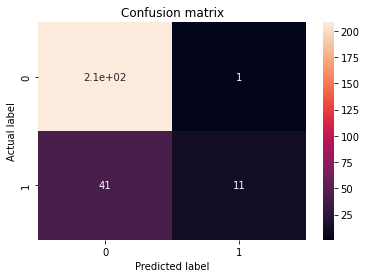

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_rf3)
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Classification metrics

Accuracy is defined as the is the ratio of the total number of correct predictions and the total number of predictions. Higher values of accuracy, is a requirement.

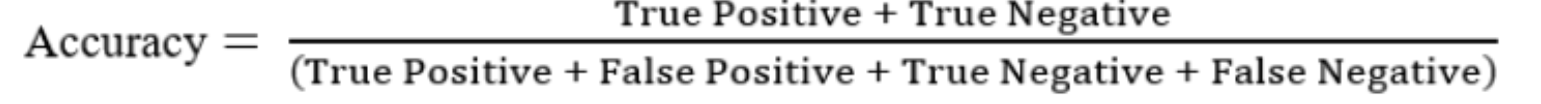


Precision is the ratio between the True Positives and all the Positives. Precision can be seen as a measure of quality. Precision also gives us a measure of the relevant data points. Higher precision values are desired.

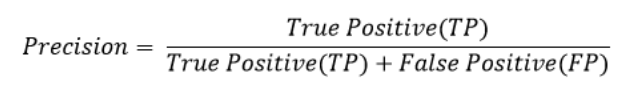



Recall is measure of our model correctly identifying True Positives. Recall also gives a measure of how accurately our model is able to identify the relevant data. Higher values are better.

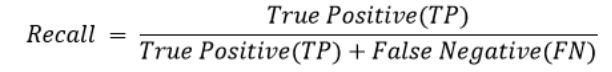

The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean.It is primarily used to compare the performance of two classifiers. It acts as a tradeoff between Precision and Recall. Higher the value, better it is.

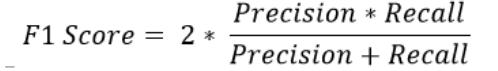








In [78]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

rf3_acc = accuracy_score(y_test,y_pred_rf3)
print("LR-Accuracy:", rf3_acc)
rf3_rec = recall_score(y_test,y_pred_rf3)
print("LR-Recall score:",rf3_rec)
rf3_f1 = f1_score(y_test,y_pred_rf3)
print("LR-F1 score:",rf3_f1)
rf3_ps = precision_score(y_test,y_pred_rf3)
print("LR-Precision score:",rf3_ps)

LR-Accuracy: 0.8390804597701149
LR-Recall score: 0.21153846153846154
LR-F1 score: 0.34374999999999994
LR-Precision score: 0.9166666666666666


#### ROC-AUC Curve

This curve shows us the behavior of the classifier for every threshold by plotting two variables: the True Positive Rate (TPR) and the False Positive Rate (FPR).

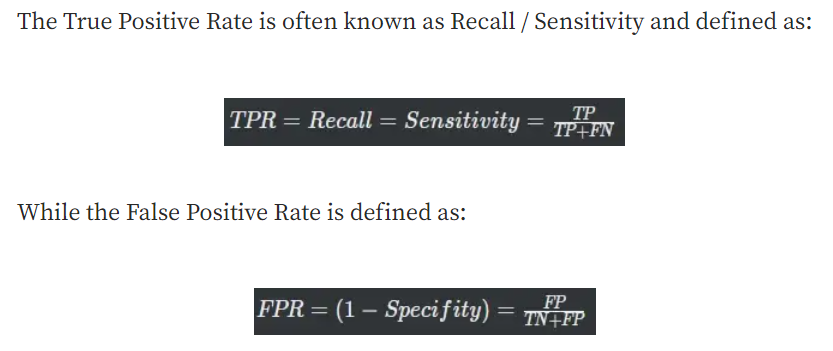

The intent of the ROC Curve is to show how well the model works for every possible threshold, as a relation of TPR vs FPR. So basically to plot the curve we need to calculate these variables for each threshold and plot it on a plane.

On the plots, the  red line represents where TPR = FPR, while the blue line represents the ROC curve of the classifier.If the ROC curve is exactly on the red line, it means that the classifier has the same predictive power as flipping a coin.

The AUROC Curve (Area Under ROC Curve) or simply ROC AUC Score, is a metric that allows us to compare different ROC Curves.

The red line is the lower limit, and the area under that line is 0.5, and the perfect ROC Curve would have an area of 1. As closer as our model’s ROC AUC is from 1, the better it is in separating classes and making better predictions.

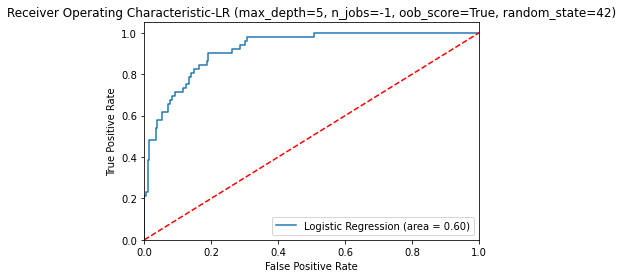

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf3_roc_auc = roc_auc_score(y_test, rf3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-LR (max_depth=5, n_jobs=-1, oob_score=True, random_state=42)')
plt.legend(loc="lower right")
plt.show()

If the blue line is relatively close to the red one, it means that the classifier is bad. The  model is a not so good enough classifier, closer to what is possible to get from real-world data. The AUC is a not so good 0.60.

### Hyper parameter tuning

After building the model, the next challenge is how to fine-tune the hyperparameters of our model so that it works well with the dataset we have. It can be done quite easily using the GridSearchCV function in the sklearn module.

Cross validation is the base of this tuning methodology. The entire data is divided into k-folds (or k-parts, i.e. 10-fold means divide the dataset into 10 equal parts). Out of the k-folds, use 1 fold for testing and k-1 folds for training.

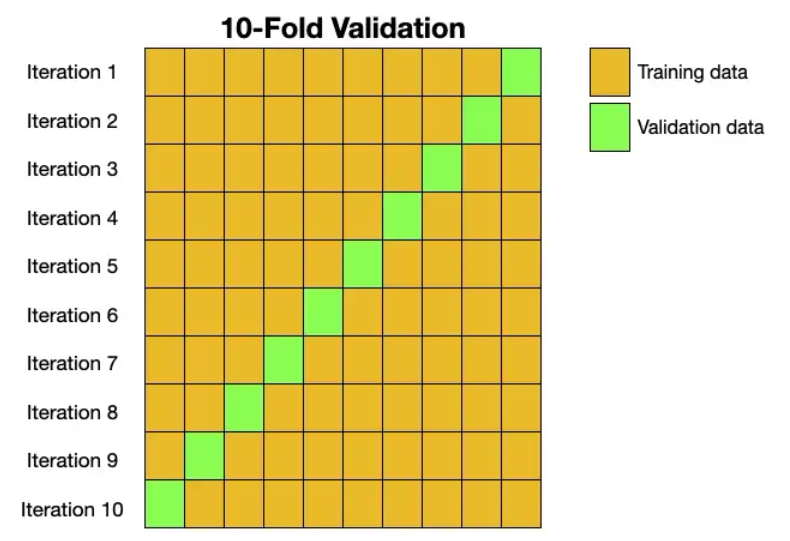

GridSearchCV is a function in sklearn’s model_selection package. It allows us to specify the different values for each hyperparameter and try out all the possible combinations when fitting our model. It does the training and testing using cross validation of our dataset — hence the acronym “CV” in GridSearchCV. The end result of GridSearchCV is a set of hyperparameters that best fit our data according to the scoring metric that we want our model to optimize on.

In [80]:
#grid search CV
from sklearn.model_selection import GridSearchCV

#dictionary containing all the various hyperparameters that you want to try when fitting your model
param_grid_rf ={'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]                
}
param_grid_rf

{'max_depth': [2, 3, 5, 10, 20],
 'min_samples_leaf': [5, 10, 20, 50, 100, 200],
 'n_estimators': [10, 25, 30, 50, 100, 200]}

In [81]:
#call the GridSearchCV() function using the algorithm that we are using, together with the various arguments
gs_rf = GridSearchCV(estimator=rf3,#estimator object
                  param_grid=param_grid_rf,
                  cv=10, #integer, to specify the number of folds in a `(Stratified)KFold`
                  scoring = 'accuracy', #evaluation metrics
                  verbose=0, #Controls the verbosity: the higher, the more messages
                  error_score='raise',
                  return_train_score=True #If False, the cv_results_ attribute will not include training scores
                 )
gs_rf

GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [82]:
#train the model
gs_rf.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [83]:
#create a dataframe with the Cross-validation results
df = pd.DataFrame(gs_rf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.258738,0.675576,0.008642,0.001668,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.817308,0.807692,...,0.820128,0.816916,0.817987,0.816916,0.821199,0.821199,0.819251,0.818182,0.818561,0.001678
1,0.050405,0.009842,0.014016,0.002014,2,5,25,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.807692,0.807692,...,0.816916,0.817987,0.816916,0.816916,0.815846,0.816916,0.816043,0.816043,0.816528,0.000678
2,0.057599,0.007118,0.010186,0.005365,2,5,30,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.807692,0.817308,...,0.816916,0.816916,0.817987,0.815846,0.815846,0.816916,0.817112,0.816043,0.816635,0.000678
3,0.088921,0.010969,0.016065,0.008300,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.817308,0.807692,...,0.816916,0.815846,0.817987,0.815846,0.815846,0.816916,0.818182,0.817112,0.816634,0.000879
4,0.161144,0.021255,0.025085,0.008180,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.817308,0.817308,...,0.816916,0.816916,0.817987,0.815846,0.816916,0.816916,0.817112,0.816043,0.816742,0.000627


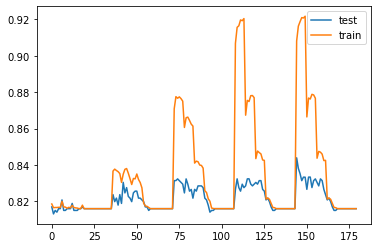

In [84]:
#plot the mean_test_score vs mean_train_score
import  matplotlib.pyplot as plt
test_scores = gs_rf.cv_results_['mean_test_score']
#print(test_scores)
train_scores = gs_rf.cv_results_['mean_train_score'] 
#print(train_scores)

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [85]:
#mean cross-validated score of the best_estimator
gs_rf.best_score_ 

0.8439413741598207

In [86]:
#parameter setting that gave the best results on the hold out data.
gs_rf.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 10}

In [87]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

### Conclusion

Since the performance of tuned model(84.3%) is less than or almost same as the base model(83.9%), we cant say if Logistic regression is the best model for our data.